In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms

from datetime import datetime

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
# Função para estratificar o dataset em k folds

def stratify_dataset(dataset, k):
    # Define qual será o dataset
    if dataset == 'dados_normalizados_aumentados_minmax':
        dataset_file = pd.read_csv("../Database/df_database_dados_normalizados_aumentados_minmax.csv")
    
    # Separa a coluna target das características
    dataset_features = dataset_file.drop('target', axis=1)
    y = dataset_file.loc[:, 'target']

    # Transformando para numpy
    #dataset_features = dataset_features.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    X = dataset_features.to_numpy()
    
    cv = StratifiedKFold(n_splits = k, shuffle = True, random_state = 1)
    
    return dataset_file, X, y, cv

In [4]:
dataset = 'dados_normalizados_aumentados_minmax'
k = 10

dataset_file, X, y, cv = stratify_dataset(dataset, k)

In [5]:
# Possíveis validações para valores nulos/ausentes ou infinitos

#print(np.count_nonzero(np.isnan(X)))     # True wherever nan
#print(np.count_nonzero(np.isposinf(X)))  # True wherever pos-inf
#print(np.count_nonzero(np.isneginf(X)))  # True wherever neg-inf
#print(np.count_nonzero(np.isinf(X)))     # True wherever pos-inf or neg-inf
#print(np.count_nonzero(~np.isfinite(X))) # True wherever pos-inf or neg-inf or nan

In [6]:
# Lista de parâmetros de treinamento e de teste para cada modelo considerado 

models_parameters = {
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9,1e-8,1e-7,1e-6,1e-5,0.0001,0.001,0.01,0.1,0.2]
        }
    },  
    'BernoulliNB':{
        'model': BernoulliNB(),
        'params': {
            'alpha':[0.0,0.001,0.01,0.1,0.2,0.5,1,1.5,10,20],
            'binarize':[0.0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(),
        'params': {
            'max_iter': [30, 60, 90, 120, 150, 200],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'learning_rate_init': [0.001, 0.01, 0.05, 0.1]
        }
    },
    'RandomForestClassifier': {
         'model': RandomForestClassifier(),
         'params': {
             'n_estimators': [10,100,250,500,750,1000],
             'criterion': ['gini', 'entropy'],
             'max_features': ['sqrt','log2',None],
             'n_jobs': [-1],
             'ccp_alpha': [0.0,0.02,0.04,0.08,0.16,0.32,0.64,1.28]
         }
    },
    'SVC':{
        'model': SVC(),
        'params': {
            'C': [0.001,0.01,0.1,0.5,1.0,1.5,5,10,20],
            'kernel': ['rbf','linear','poly','sigmoid'],
            'gamma': ['auto','scale',0.001,0.01,0.1]
        }
    }
}

In [7]:
# Lista de métricas para rankeamento nos testes

scoring = {
    'roc_auc_ovr_scorer': make_scorer(roc_auc_score, average='macro', needs_proba = True, multi_class='ovr'),
    'roc_auc_ovo_scorer': make_scorer(roc_auc_score, average='macro', needs_proba = True, multi_class='ovo'),
    'precision_scorer': make_scorer(precision_score, average='macro'),
    'recall_scorer': make_scorer(recall_score, average='macro')
}

>>>>>>>>>> Processing model GaussianNB.
Confusion matrix

     SAN  CMD  CMH
SAN  185    1   14
CMD   31  138   31
CMH   84   20   96




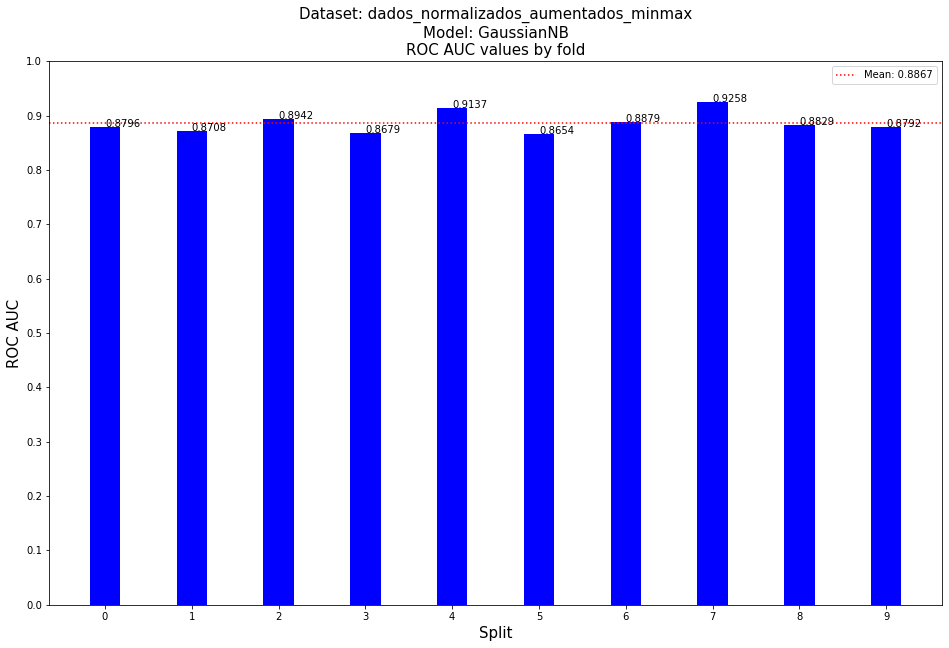

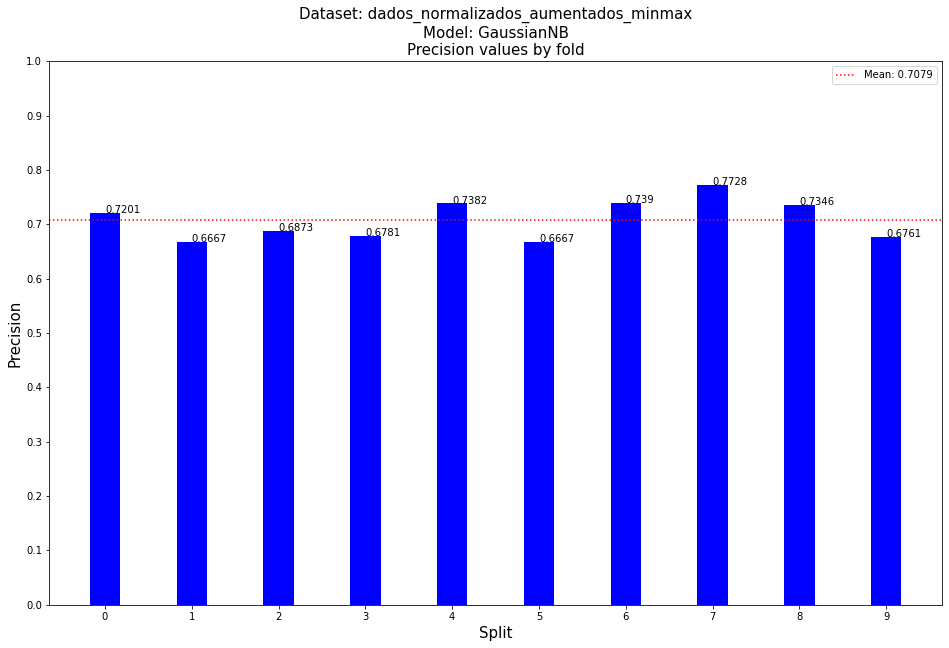

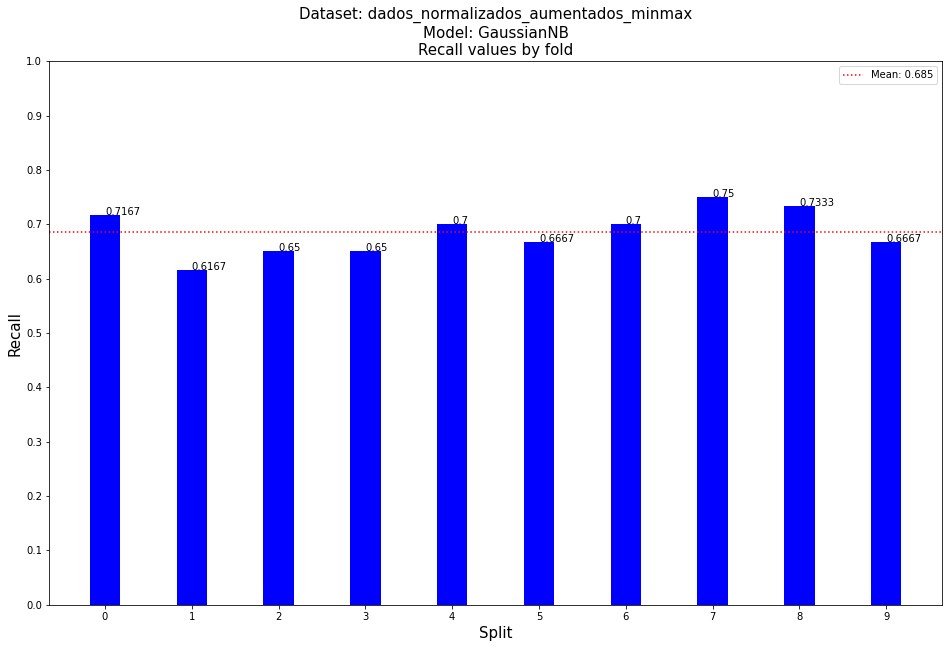

>>>>>>>>>> Processing model BernoulliNB.
Confusion matrix

     SAN  CMD  CMH
SAN  124   55   21
CMD   36  134   30
CMH   19   17  164




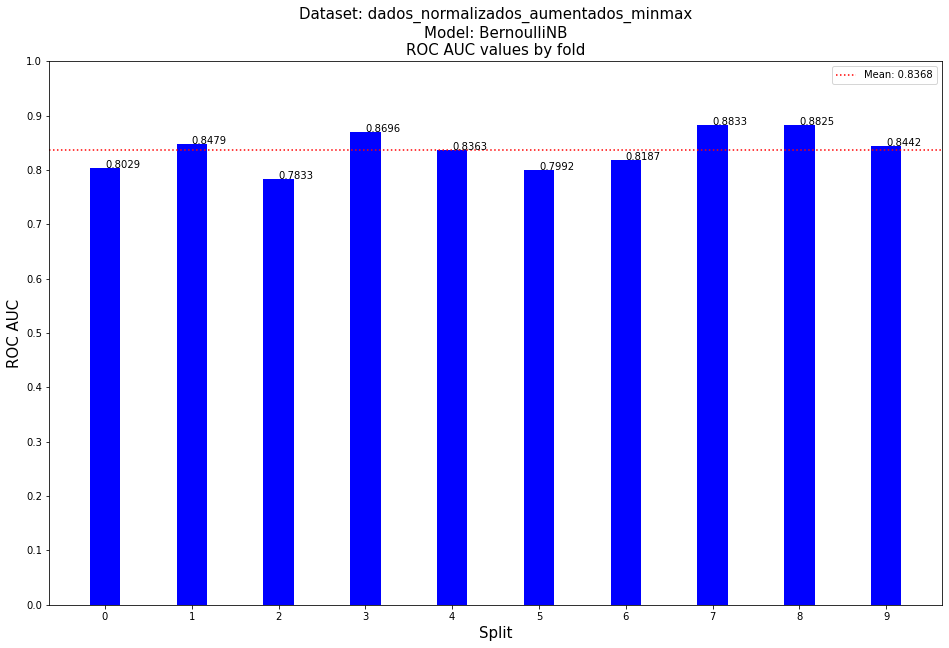

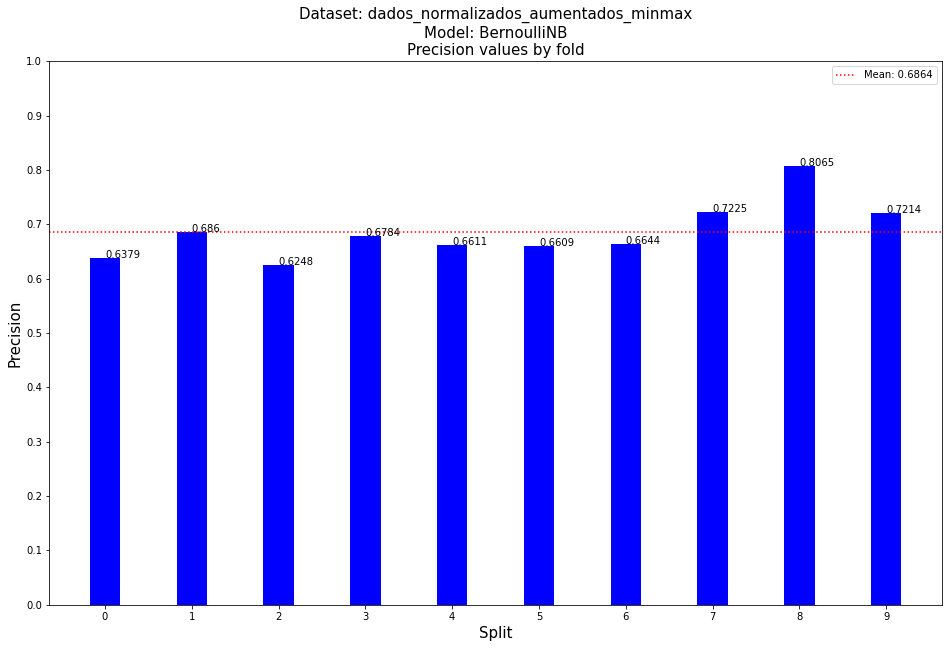

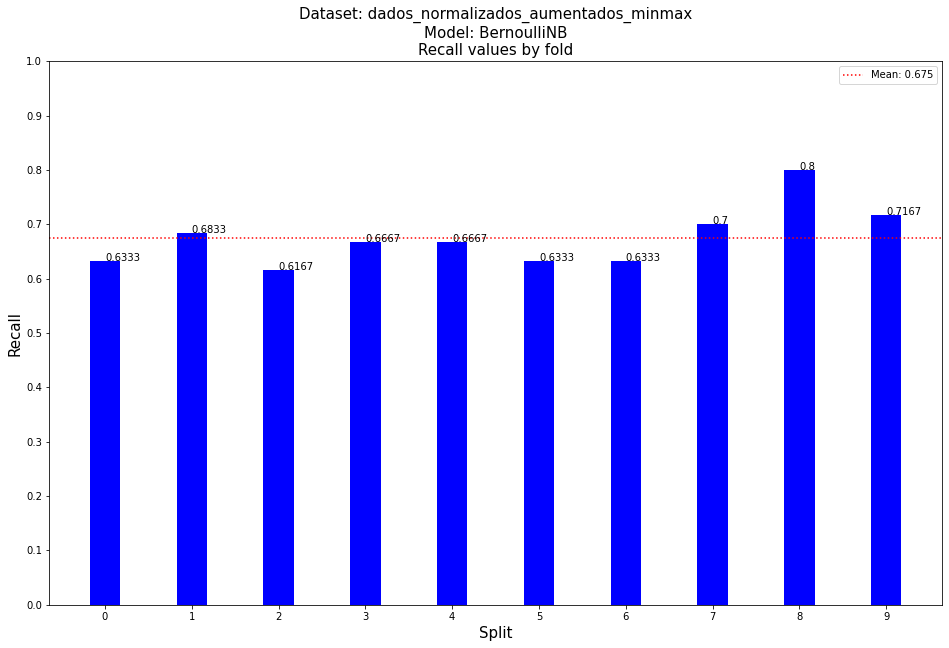

>>>>>>>>>> Processing model MLPClassifier.


D:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion matrix

     SAN  CMD  CMH
SAN  192    2    6
CMD    6  184   10
CMH    6    6  188




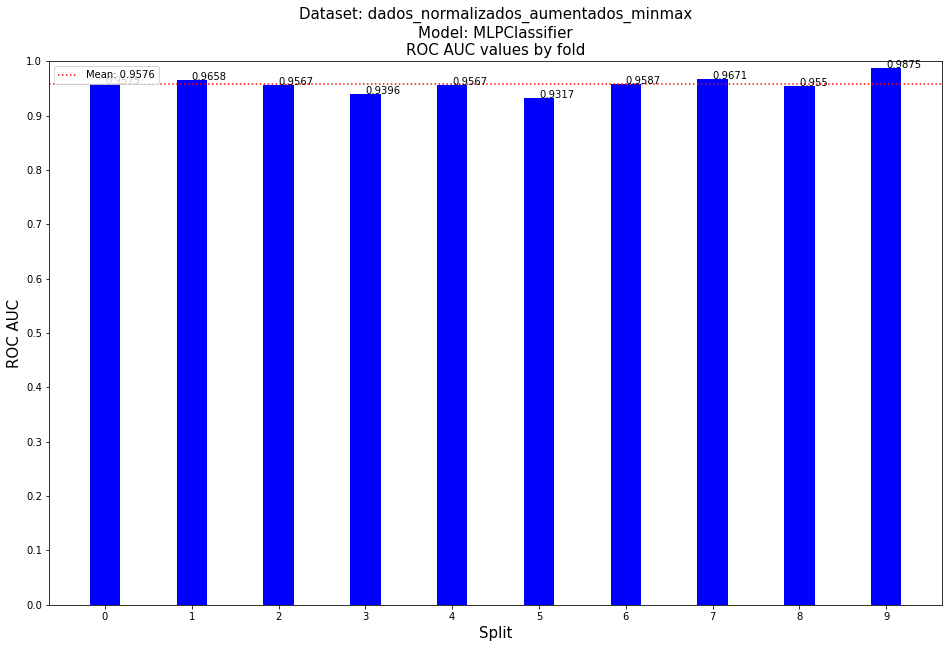

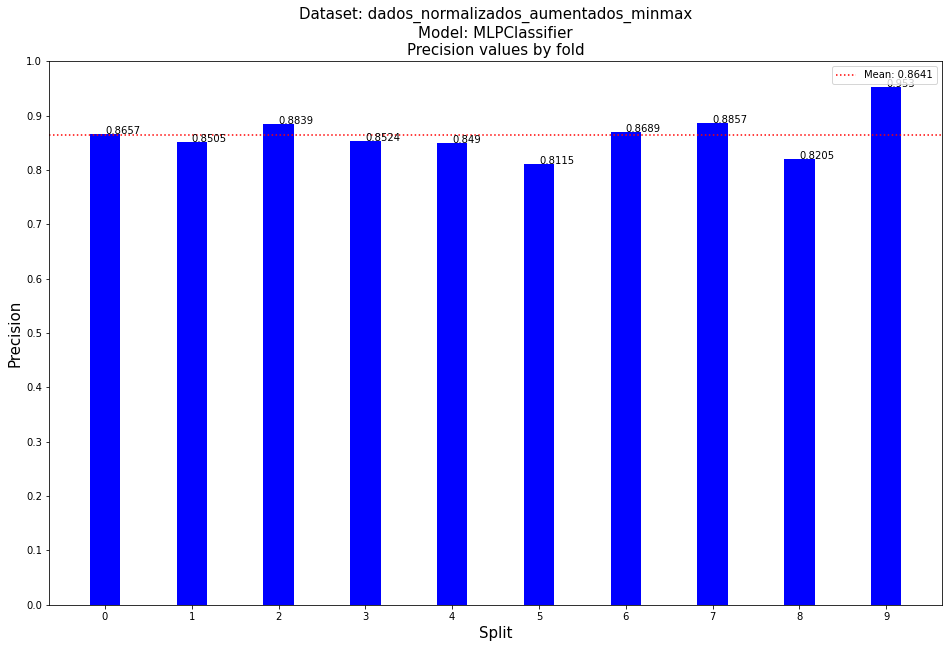

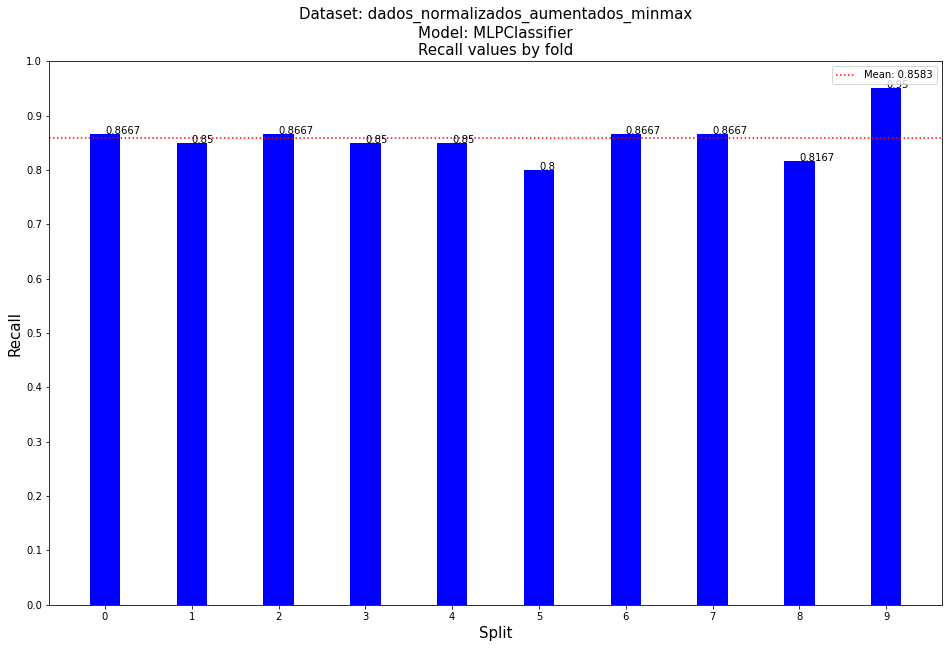

>>>>>>>>>> Processing model RandomForestClassifier.
Confusion matrix

     SAN  CMD  CMH
SAN  200    0    0
CMD    0  200    0
CMH    0    0  200




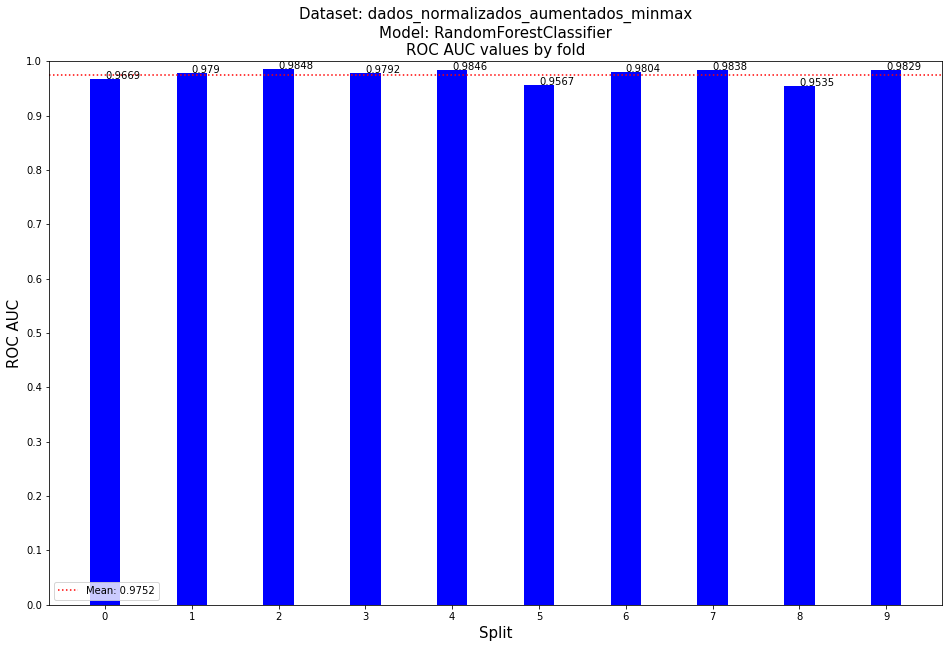

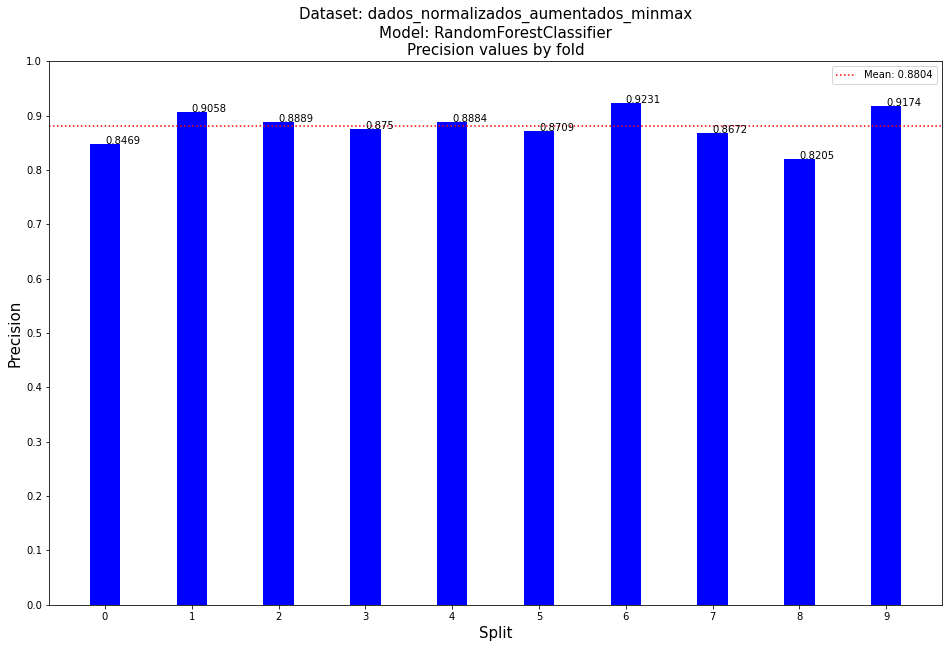

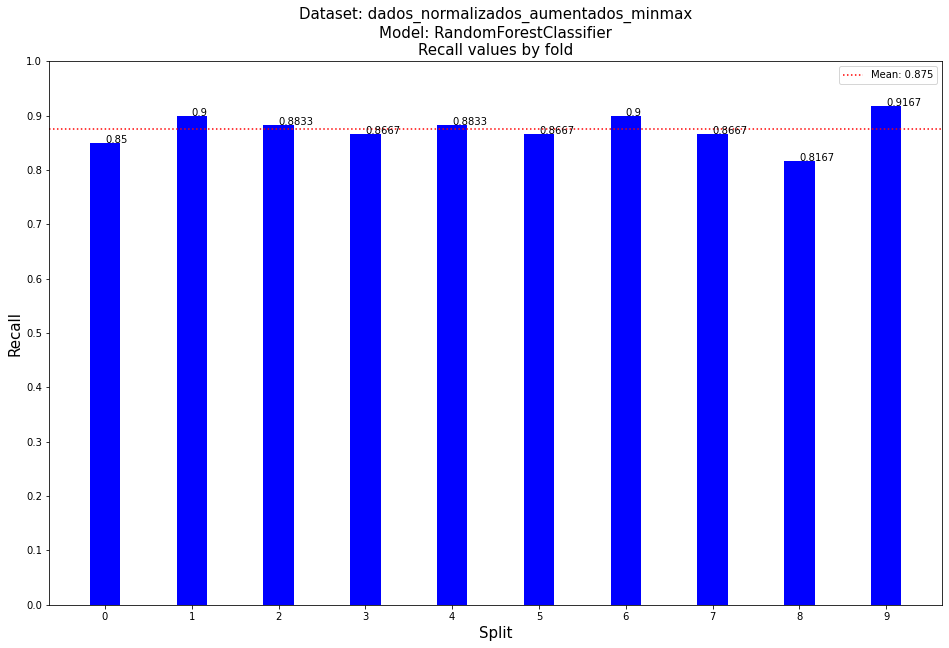

>>>>>>>>>> Processing model SVC.


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite 

Confusion matrix

     SAN  CMD  CMH
SAN  178    1   21
CMD   42  120   38
CMH  102   20   78




posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

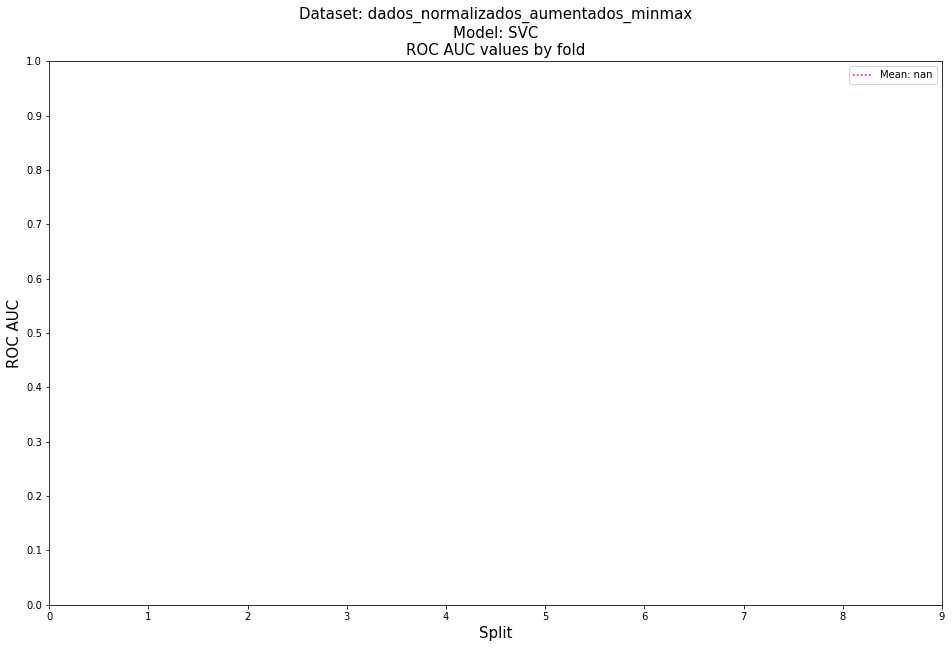

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

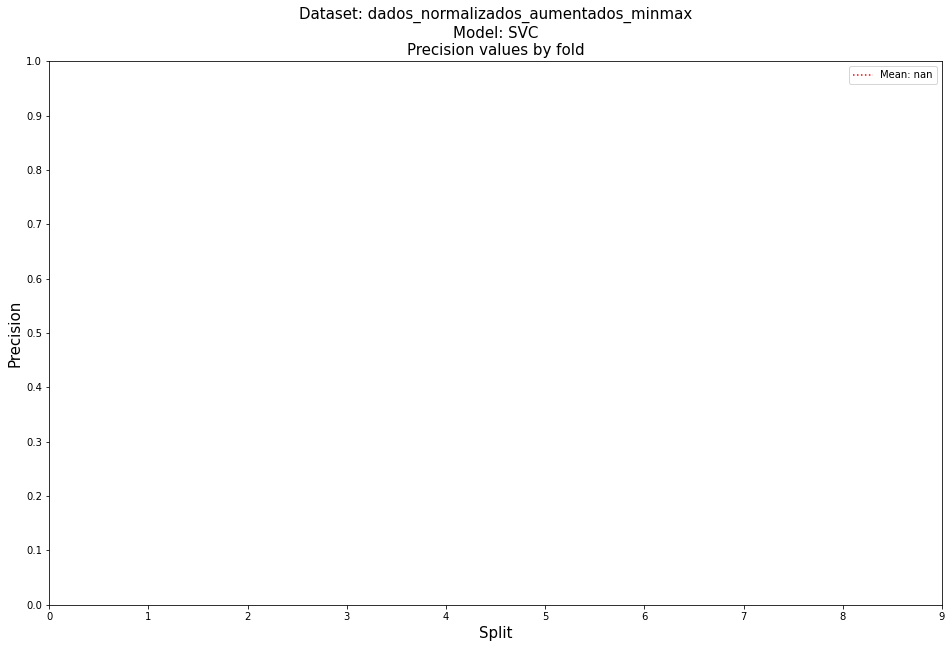

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

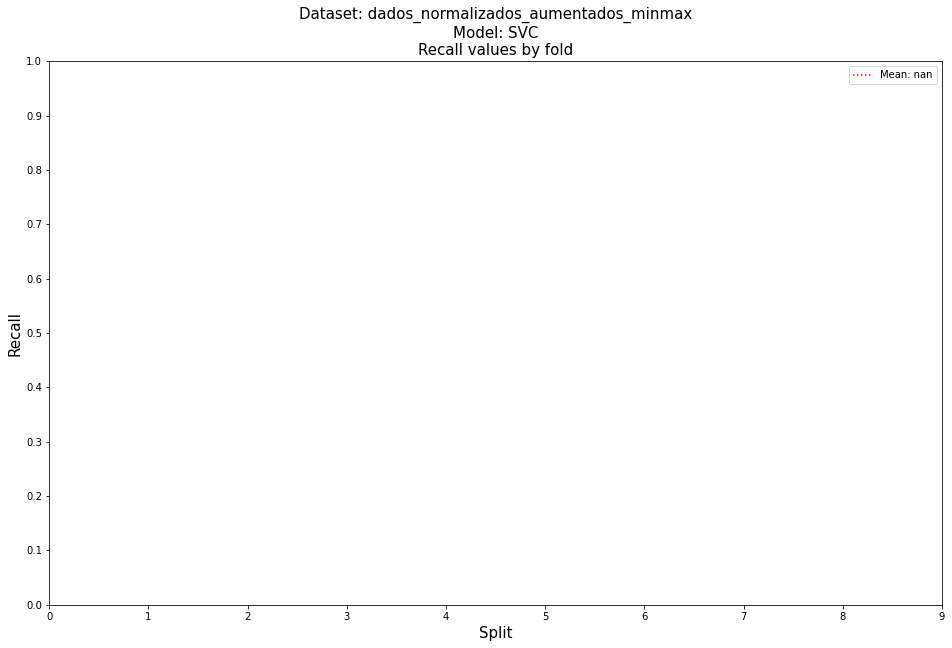

In [8]:
# Processamento principal

# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d_%H-%M-%S")

# 
df_best_results = None
best_results = []

#print(X.dtype)
#print(Y.dtype)

for model_name, model_parameters in models_parameters.items():
    print(f'>>>>>>>>>> Processing model {model_name}.')
    classifier = GridSearchCV(model_parameters['model'], model_parameters['params'], cv=cv, scoring=scoring, refit='roc_auc_ovr_scorer', n_jobs=-1)
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    
    # Gera dataframe de todos os resultados obtidos para cada combinação de parâmetros 
    results = pd.DataFrame(classifier.cv_results_)
    
    #print('Results\n')
    #print(results)
    #print('\n')
    
    # Seleciona o melhor resultado (combinação de parâmetros) com base no scorer 'roc_auc_ovr_scorer'
    
    results = results.sort_values(by=['rank_test_roc_auc_ovr_scorer'])
    
    best_result = results.head(1)
    
    #print('Best result\n')
    #print(best_result)
    #print('\n')
    
    # Guarda as médias das métricas para o melhor resultado
    
    mean_test_roc_auc_ovr_scorer = best_result['mean_test_roc_auc_ovr_scorer']
    mean_test_roc_auc_ovo_scorer = best_result['mean_test_roc_auc_ovo_scorer']
    mean_test_precision_scorer = best_result['mean_test_precision_scorer']
    mean_test_recall_scorer = best_result['mean_test_recall_scorer']
    
    # CALCULA O ÍNDICE DE CONFIANÇA DO MELHOR RESULTADO PARA CADA MÉTRICA
    IC_ROC_OVR=[]
    IC_ROC_OVO=[]
    IC_PRECISION=[]
    IC_RECALL=[]
    
    vrocovr=[]
    vrocovo=[]
    vprecision=[]
    vrecall=[]
    
    for i in range(0,k):
        vrocovr.append(best_result['split' + str(i) + '_test_roc_auc_ovr_scorer'].values)
        vrocovo.append(best_result['split' + str(i) + '_test_roc_auc_ovo_scorer'].values)
        vprecision.append(best_result['split' + str(i) + '_test_precision_scorer'].values)
        vrecall.append(best_result['split' + str(i) + '_test_recall_scorer'].values)
    
    IC_ROC_OVR = sms.DescrStatsW(vrocovr).tconfint_mean(alpha=0.05)
    IC_ROC_OVO = sms.DescrStatsW(vrocovo).tconfint_mean(alpha=0.05)
    IC_PRECISION = sms.DescrStatsW(vprecision).tconfint_mean(alpha=0.05)  
    IC_RECALL = sms.DescrStatsW(vrecall).tconfint_mean(alpha=0.05)
    
    #print('Confidence interval\n')
    #print(IC_ROC_OVR)
    #print(IC_ROC_OVO)
    #print(IC_PRECISION)
    #print(IC_RECALL)
    #print('\n')
    
    # DEFINE MATRIZ DE CONFUSÃO
    confusion_matrix_test = pd.DataFrame(confusion_matrix(y, y_pred, labels=[0,1,2]), columns = ['SAN', 'CMD', 'CMH'], index = ['SAN', 'CMD', 'CMH'])
    
    print('Confusion matrix\n')
    print(confusion_matrix_test)
    print('\n')
    
    # EXIBE GRÁFICO - ROC AUC OVR
    
    vrocovr_u = []
    
    for i in range(len(vrocovr)):
        vrocovr_u.append(vrocovr[i][0])
    
    x = range(len(vrocovr_u))
    
    mean = mean_test_roc_auc_ovr_scorer.values[0]
    
    plt.figure(figsize=(16,10))
    
    plt.xlabel('Split', fontsize=15)
    plt.ylabel('ROC AUC', fontsize=15)
    
    plt.ylim(0.0, 1.0)
    
    plt.xticks(np.arange(0, len(vrocovr_u), 1))
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    
    plt.title(f'Dataset: {dataset}\n' + f'Model: {model_name}\n' + f'ROC AUC values by fold', fontsize=15)
    
    plt.bar(x, vrocovr_u, 0.35, color="blue")
    
    for i in x:
        plt.text(i,round(float(vrocovr_u[i]),4),round(float(vrocovr_u[i]),4))
    
    plt.axhline(mean, color='red', ls='dotted', label=f'Mean: {round(float(mean),4)}')
    
    plt.legend()
    
    plt.savefig(f'../Resultados/graph_{model_name}_{dt_string}_roc_auc_ovr_splits.png', bbox_inches='tight')
    plt.show()
    
    # EXIBE GRÁFICO - PRECISION
    
    vprecision_u = []
    
    for i in range(len(vprecision)):
        vprecision_u.append(vprecision[i][0])
    
    x = range(len(vprecision_u))
    
    mean = mean_test_precision_scorer.values[0]
    
    plt.figure(figsize=(16,10))
    
    plt.xlabel('Split', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    
    plt.ylim(0.0, 1.0)
    
    plt.xticks(np.arange(0, len(vprecision_u), 1))
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    
    plt.title(f'Dataset: {dataset}\n' + f'Model: {model_name}\n' + f'Precision values by fold', fontsize=15)
    
    plt.bar(x, vprecision_u, 0.35, color="blue")
    
    for i in x:
        plt.text(i,round(float(vprecision_u[i]),4),round(float(vprecision_u[i]),4))
    
    plt.axhline(mean, color='red', ls='dotted', label=f'Mean: {round(float(mean),4)}')
    
    plt.legend()
    
    plt.savefig(f'../Resultados/graph_{model_name}_{dt_string}_precision_splits.png', bbox_inches='tight')
    plt.show()
    
    # EXIBE GRÁFICO - RECALL
    
    vrecall_u = []
    
    for i in range(len(vrecall)):
        vrecall_u.append(vrecall[i][0])
    
    x = range(len(vrecall_u))
    
    mean = mean_test_recall_scorer.values[0]
    
    plt.figure(figsize=(16,10))
    
    plt.xlabel('Split', fontsize=15)
    plt.ylabel('Recall', fontsize=15)
    
    plt.ylim(0.0, 1.0)
    
    plt.xticks(np.arange(0, len(vrecall_u), 1))
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    
    plt.title(f'Dataset: {dataset}\n' + f'Model: {model_name}\n' + f'Recall values by fold', fontsize=15)
    
    plt.bar(x, vrecall_u, 0.35, color="blue")
    
    for i in x:
        plt.text(i,round(float(vrecall_u[i]),4),round(float(vrecall_u[i]),4))
    
    plt.axhline(mean, color='red', ls='dotted', label=f'Mean: {round(float(mean),4)}')
    
    plt.legend()
    
    plt.savefig(f'../Resultados/graph_{model_name}_{dt_string}_recall_splits.png', bbox_inches='tight')
    plt.show()
    
    # ARMAZENA O MELHOR RESULTADO DO MODELO NOS RESULTADOS GERAIS
    
    best_results.append({
        'dataset': dataset,
        'model': model_name,
        'best_params': classifier.best_params_,
        'best_score': f'{round(float(classifier.best_score_),4)}',
        'mean_test_roc_auc_ovr': f'{round(float(mean_test_roc_auc_ovr_scorer.values[0]),4)}',
        'ci_mean_test_roc_auc_ovr': f'{round(float(IC_ROC_OVR[0]),4)};{round(float(IC_ROC_OVR[1]),4)}',
        'mean_test_roc_auc_ovo': f'{round(float(mean_test_roc_auc_ovo_scorer.values[0]),4)}',
        'ci_mean_test_roc_auc_ovo': f'{round(float(IC_ROC_OVO[0]),4)};{round(float(IC_ROC_OVO[1]),4)}',
        'mean_test_precision': f'{round(float(mean_test_precision_scorer.values[0]),4)}',
        'ci_mean_test_precision': f'{round(float(IC_PRECISION[0]),4)};{round(float(IC_PRECISION[1]),4)}',
        'mean_test_recall': f'{round(float(mean_test_recall_scorer.values[0]),4)}',
        'ci_mean_test_recall': f'{round(float(IC_RECALL[0]),4)};{round(float(IC_RECALL[1]),4)}'
    })

df_best_results = pd.DataFrame(best_results, columns = ['dataset',
                                                        'model',
                                                        'best_params',
                                                        'best_score',
                                                        'mean_test_roc_auc_ovr',
                                                        'ci_mean_test_roc_auc_ovr',
                                                        'mean_test_roc_auc_ovo',
                                                        'ci_mean_test_roc_auc_ovo',
                                                        'mean_test_precision',
                                                        'ci_mean_test_precision',
                                                        'mean_test_recall',
                                                        'ci_mean_test_recall'])

df_best_results.to_csv(r'../Resultados/results_' + dt_string + '_' + dataset + '.csv', index = False)
